In [130]:
import numpy as np
from scipy.optimize import linprog

import seaborn as sns
import matplotlib.pylab as plt

Задача: найти такой x, что $c^Tx → \underset{x}{min}$ при условии, что $A^Tx \geq h$

- $A$ - матрица со всеми возможными сменами всех возможных длин смен
- $h$ - входное массив с необходимым количеством курьеров
- $c$ - штраф за лишние часы ($\forall i: c_i = 1  $)

In [131]:
A = []

for i in range(4, 9):
  for j in range(11 - i + 1):
    temp_list = []
    temp_list.extend([0]*j)
    temp_list.extend([1]*i)
    last_zero_slice = 11 - j - i
    temp_list.extend([0]*last_zero_slice)
    A.append(temp_list)
A = np.array(A)

In [132]:
A

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1,

In [133]:
h = [1, 5, 3, 1, 2, 1, 3, 5, 6, 3, 1]
h_revert = [-item for item in h]
h_revert

[-1, -5, -3, -1, -2, -1, -3, -5, -6, -3, -1]

In [134]:
c = [1]*30

In [135]:
res = linprog(c=c, A_ub=-A.T, b_ub=h_revert, method='simplex')
res

     con: array([], dtype=float64)
     fun: 8.0
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([0., 0., 2., 4., 2., 2., 2., 1., 0., 0., 0.])
  status: 0
 success: True
       x: array([1., 1., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0.])

In [136]:
res = res.x.astype(int)

shifts = []
for i in res.nonzero()[0]:
  for count in range(res[i]):
    shifts.append(A[i])

shifts = (np.array(shifts).T * np.array([1, 2, 3, 4, 5, 6, 7, 8])).T

In [137]:
sns.set(rc={'figure.figsize': (15, 8)})

def plot_heatmap(data, title):
  ax = sns.heatmap(
      data, 
      annot=True, 
      cmap='coolwarm', 
      cbar=False, 
      square=True, 
      xticklabels=[i for i in range(10, 21)],
      yticklabels=[i + 1 for i in range(data.shape[0])]
  )
  ax.set(xlabel='Интервал времени', ylabel='Номер рабочей смены', title=title)
  plt.show()

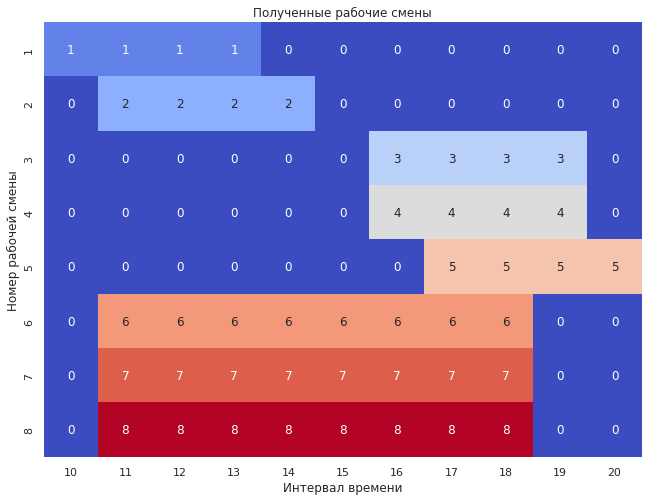

In [138]:
plot_heatmap(shifts, 'Полученные рабочие смены')

In [139]:
res = []
for i in range(shifts.shape[1]):
  non_zero_items =  shifts[:, i][shifts[:, i].nonzero()].tolist() 
  res.append([0]*(shifts.shape[1] - len(non_zero_items)) + non_zero_items)
shift_tiling = np.array(res).T[3:]

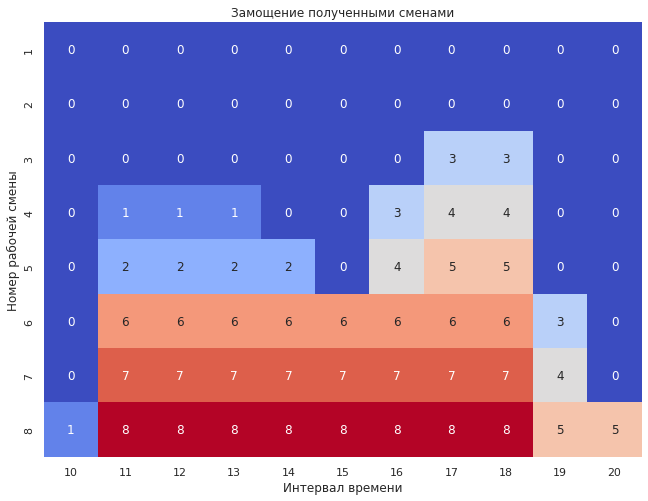

In [140]:
plot_heatmap(shift_tiling, 'Замощение полученными сменами')